In [158]:
import pandas as pd

df_dev = pd.read_csv('data/development_processed.csv').set_index('Id')
df_eval = pd.read_csv('data/evaluation_processed.csv').set_index('Id')

In [159]:
columns_to_drop = [f'MFCC-{i}-mean' for i in range(1, 14)] + [f'MFCC-{i}-std' for i in range(1, 14)] + [f'MFCCD-{i}-mean' for i in range(1, 14)]
df_dev = df_dev.drop(columns=columns_to_drop)
df_eval = df_eval.drop(columns=columns_to_drop)

<Axes: >

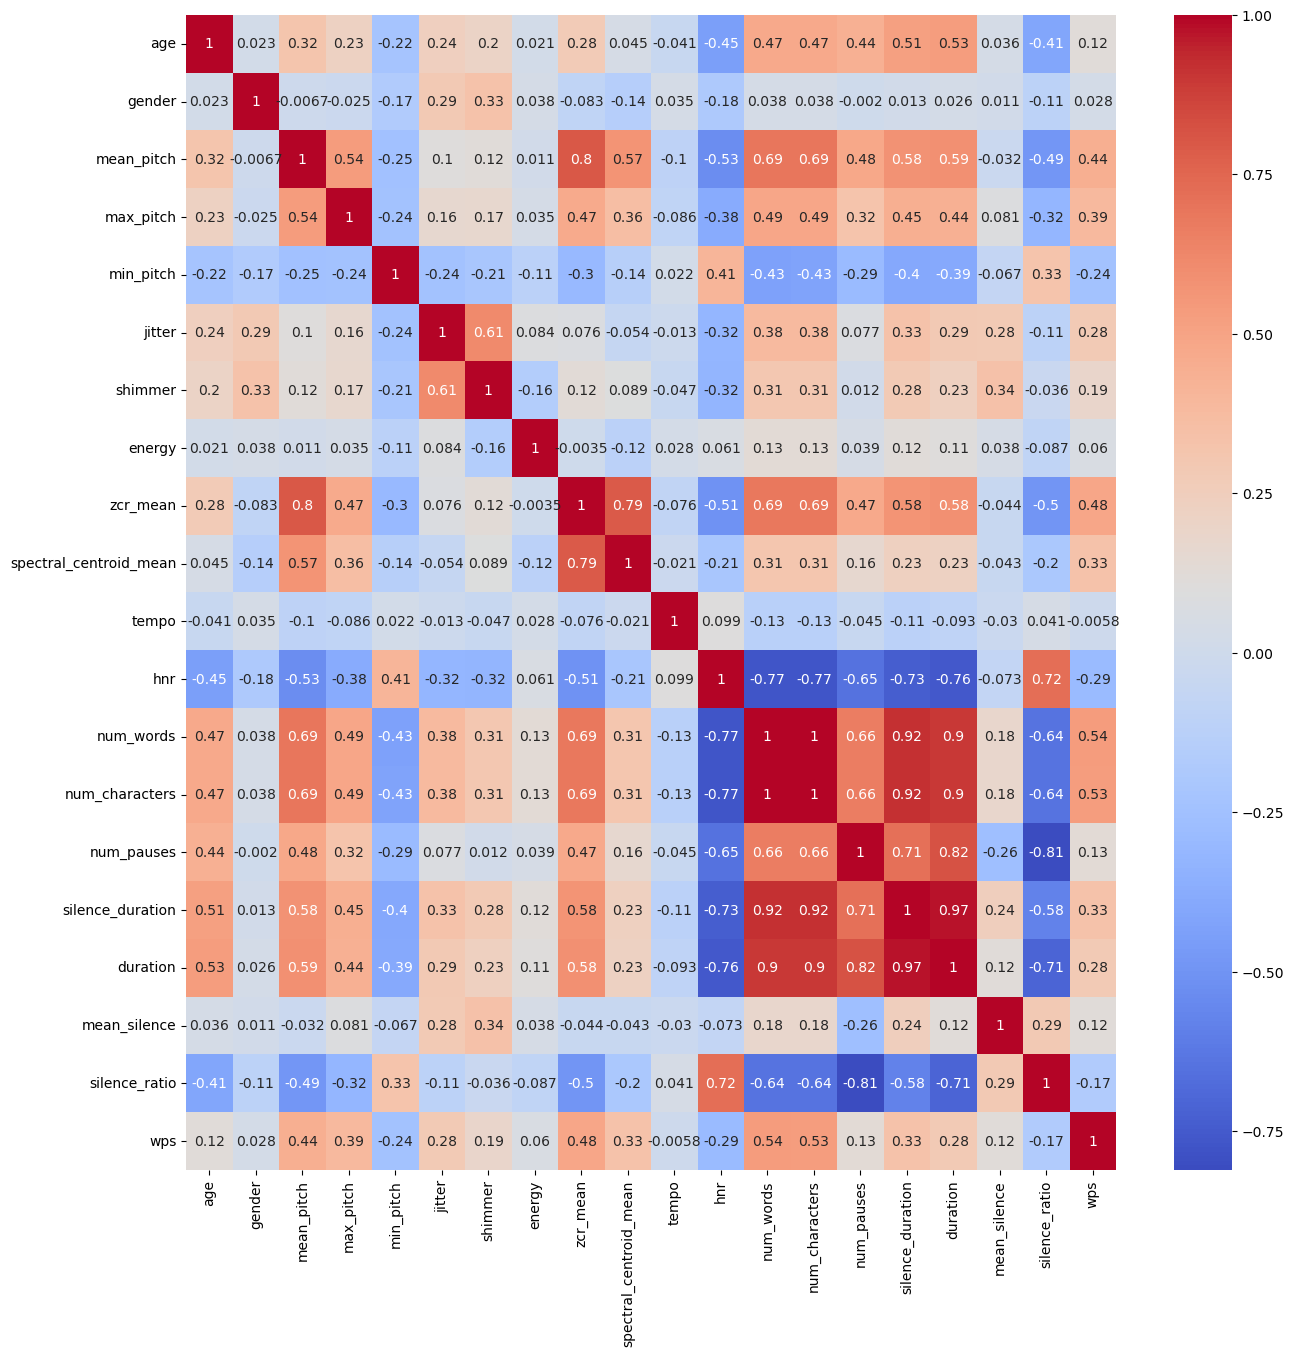

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df_dev.corr(), cmap="coolwarm", annot=True)

In [161]:
df_dev.drop(columns=['duration', 'num_characters', 'num_words', 'num_pauses'], inplace=True)
df_eval.drop(columns=['duration', 'num_characters', 'num_words', 'num_pauses'], inplace=True)

<Axes: >

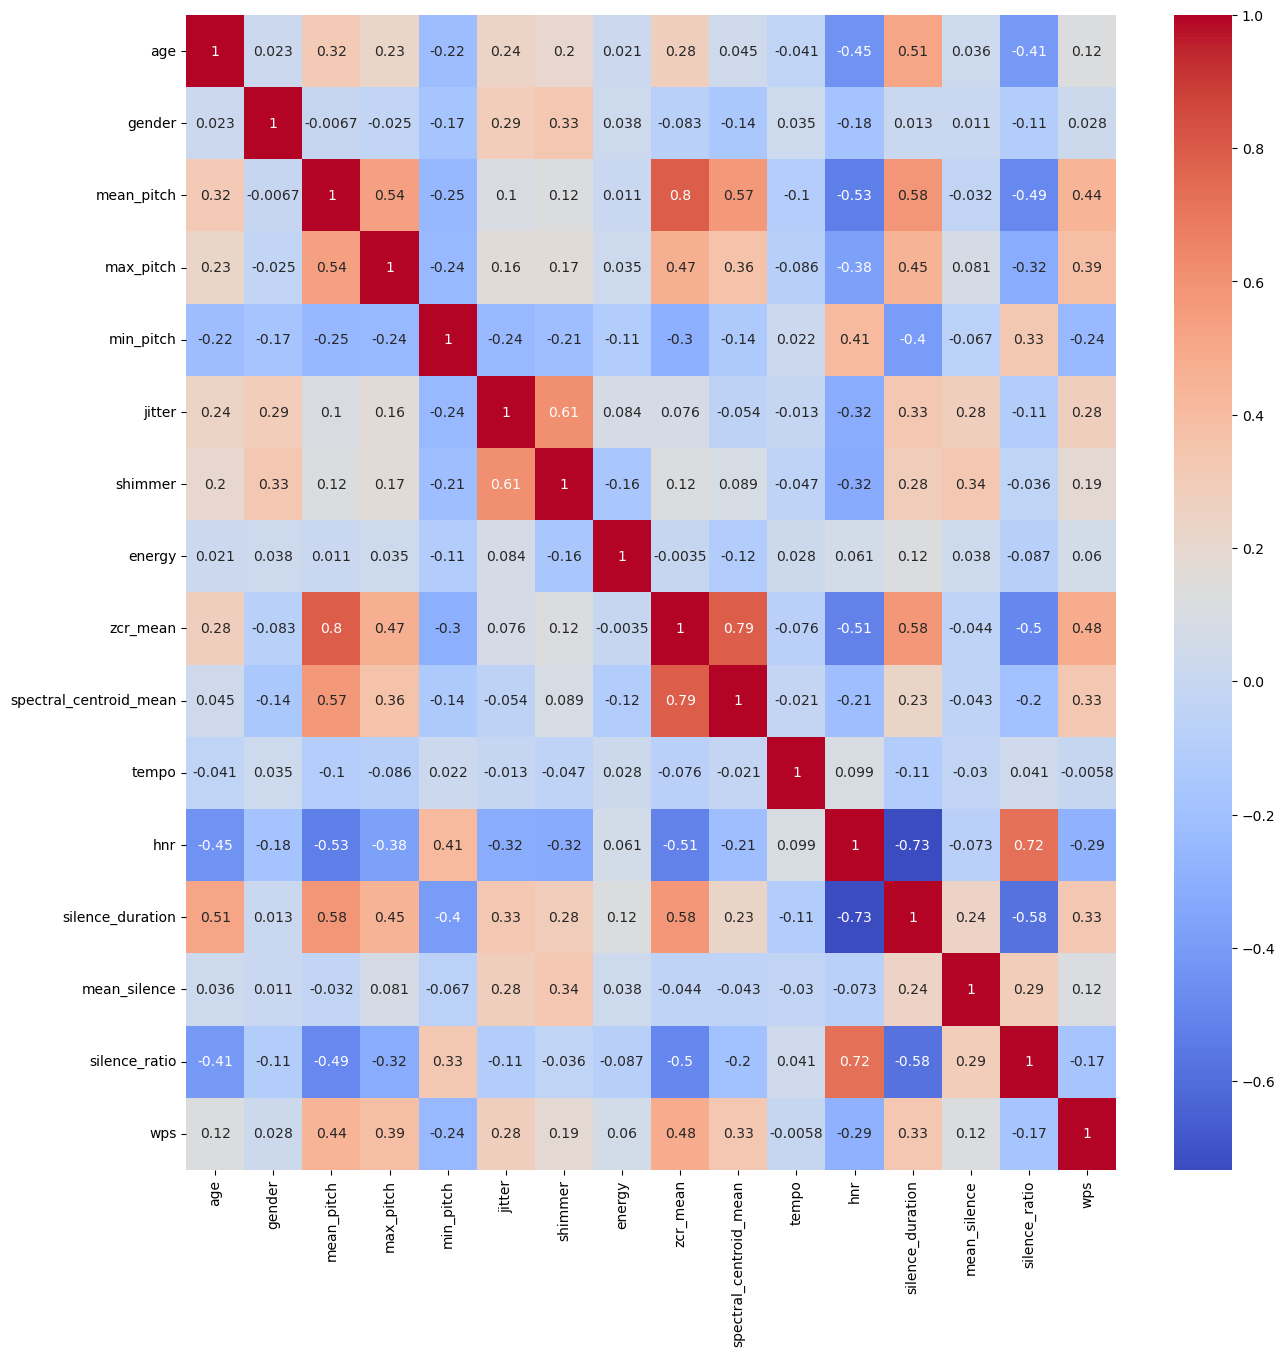

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(df_dev.corr(), cmap="coolwarm", annot=True)

In [163]:
from sklearn.model_selection import train_test_split
X = df_dev.drop(columns=['age'])
y = df_dev['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error  

for reg in [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), SVR(), KNeighborsRegressor(), MLPRegressor()]:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f'{type(reg)} RMSE: {rmse}')

<class 'sklearn.linear_model._base.LinearRegression'> RMSE: 10.390681745876737
<class 'sklearn.linear_model._coordinate_descent.Lasso'> RMSE: 10.675312220658482
<class 'sklearn.linear_model._ridge.Ridge'> RMSE: 10.39059398005503
<class 'sklearn.ensemble._forest.RandomForestRegressor'> RMSE: 10.311839067664437
<class 'sklearn.svm._classes.SVR'> RMSE: 10.654785404776527
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> RMSE: 10.957995532888644
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> RMSE: 10.18045940904226


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
mlp = MLPRegressor()

param_grid = {
    'hidden_layer_sizes': [(100, 50), (200,), (200, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1000],
    'early_stopping': [True, False],
    'tol': [1e-2],
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, refit=True, verbose=10)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

y_pred = grid_search.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'MLP RMSE: {rmse}')

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


KeyboardInterrupt: 

In [152]:
# from sklearn.feature_selection import RFECV

# X = scaler.fit_transform(X)
# X_test = scaler.transform(df_eval)

# grid_search.best_estimator_.fit(X, y)
# y_pred = grid_search.best_estimator_.predict(X_test)

# out_df = pd.DataFrame({'Predicted': y_pred})
# out_df.index.name = "Id"

# out_df.to_csv('out/mfcc.csv')

In [155]:
df_dev.columns

Index(['age', 'gender', 'mean_pitch', 'max_pitch', 'min_pitch', 'jitter',
       'shimmer', 'energy', 'zcr_mean', 'spectral_centroid_mean', 'tempo',
       'hnr', 'silence_duration', 'mean_silence', 'silence_ratio', 'wps'],
      dtype='object')